# SmartMeshIP

The notebook is executed on Colab. Therefore there might be some lines that do not work perfectly within the project's virutal environment.

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt
import numpy as np

def lineplot(matrix, legend, xlabel='Date', ylabel='Value', title=None):
    """
    Creates a line plot.
    """
    sn.set(font_scale=1)
    f, ax = plt.subplots(figsize=(12, 5))
    xticks = matrix[0]

    for row in range(1, len(matrix)):
        line = matrix[row]
        ax.plot(xticks, line, lw=1.5, marker='o')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.legend(legend)
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()


def two_axis_lineplot(matrix, legend, xlabel='Date', ylabel1='Value', ylabel2='Value2', title=None, last=1):
    """
    Creates a line plot.
    """
    sn.set(font_scale=1)
    f, ax = plt.subplots(figsize=(12, 5))
    ax2 = ax.twinx()
    xticks = matrix[0]
    length = len(matrix)
    threshold = length - last 

    for row in range(1, len(matrix)):
        line = matrix[row]
        if row < threshold:
            ax.plot(xticks, line, lw=1.5, marker='o', label=legend[row-1])
        else:
            ax2.plot(xticks, line, lw=1.5, marker='s', color='r', label=legend[row-1])

    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel1)
    ax2.set_ylabel(ylabel2)
    f.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
    if title is not None:
        plt.title(title)
    plt.tight_layout()
    plt.show()


def pie_chart(motes_number, current_consumption, labels, title='Pie Chart', detached_index=1):
    """
    Plots a pie chart.
    """
    sn.set()
    pie_values = np.multiply(motes_number, current_consumption)
    # This variable specifies the fraction of the radius with which to offset each wedge
    explode = np.zeros(shape=len(pie_values))
    # In this case only the first element is detached from the main body of the pie
    explode[detached_index] = 0.1
    # Plot the pie chart
    f, ax = plt.subplots(figsize=(6,6))
    plt.pie(pie_values, labels=labels, explode=explode, shadow=True, autopct='%1.2f%%', startangle=90)
    plt.title(title)
    plt.tight_layout()
    plt.show()


def radar_chart(matrix, legend, labels, title=None, figsize=(8,8), bbox_to_anchor=(1.05, 1.05)):
    """
    Creates a radar plot.
    """
    sn.set(font_scale=1)
    # Number of variables we're plotting.
    num_vars = len(labels)
    # Split the circle into even parts and save the angles
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]
    fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(polar=True))
    xticks = matrix[0]
    for row in range(1, len(matrix)):
        values = matrix[row]
        values += values[:1]
        # todo ///////////////////////////////
        ax.plot(angles, values, linewidth=1)
        ax.fill(angles, values, alpha=0.25)
    # Fix axis to go in the right order and start at 12 o'clock.
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    # Draw axis lines for each angle and label.
    ax.set_thetagrids(np.degrees(angles), labels)
    # Go through labels and adjust alignment based on where
    # it is in the circle.
    for label, angle in zip(ax.get_xticklabels(), angles):
        if angle in (0, np.pi):
            label.set_horizontalalignment('center')
        elif 0 < angle < np.pi:
            label.set_horizontalalignment('left')
        else:
            label.set_horizontalalignment('right')
    ax.set_rgrids(xticks)
    # Set position of y-labels (0-100) to be in the middle
    # of the first two axes.
    ax.set_rlabel_position(180 / num_vars)
    # Change the color of the tick labels.
    ax.tick_params(colors='#222222')
    # Make the y-axis (0-100) labels smaller.
    ax.tick_params(axis='y', labelsize=8)
    # Change the color of the circular gridlines.
    ax.grid(color='#AAAAAA')
    # Change the color of the outermost gridline (the spine).
    ax.spines['polar'].set_color('#222222')
    # Change the background color inside the circle itself.
    ax.set_facecolor('#FAFAFA')
    if title is not None:
        # Add title.
        ax.set_title(title)
    # Add a legend as well.
    ax.legend(legend, bbox_to_anchor=bbox_to_anchor, loc='upper right')
    plt.tight_layout()
    plt.show()

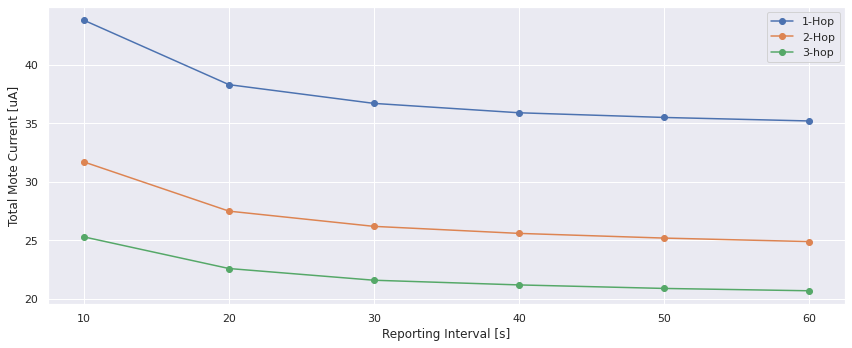

In [ ]:
matrix = [[10, 20, 30, 40, 50, 60], 
          [43.8, 38.3, 36.7, 35.9, 35.5, 35.2],
          [31.7, 27.5, 26.2, 25.6, 25.2, 24.9],
          [25.3, 22.6, 21.6, 21.2, 20.9, 20.7]]

lineplot(matrix, legend=['1-Hop', '2-Hop', '3-hop'], xlabel='Reporting Interval [s]', ylabel='Total Mote Current [uA]')

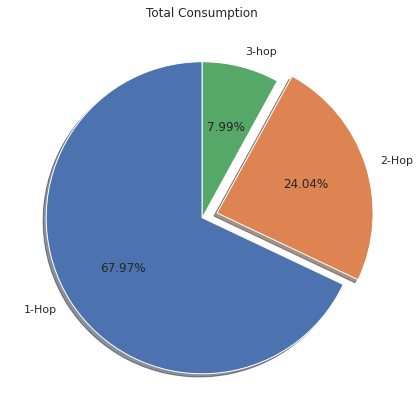

In [ ]:
motes_number = [10, 5, 2] 
current_consumption = [35.2, 24.9, 20.7]
labels = ['1-Hop', '2-Hop', '3-hop']
pie_chart(motes_number, current_consumption, labels, title='Total Consumption', detached_index=1)

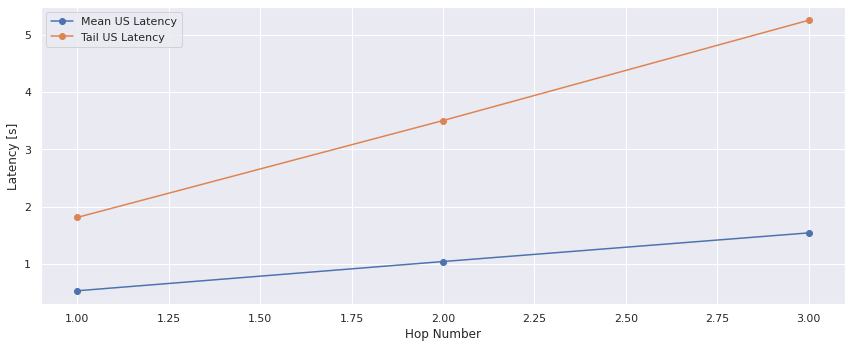

In [ ]:
matrix = [[1, 2, 3],
          [0.53, 1.04, 1.54],
          [1.81, 3.5, 5.25]]
lineplot(matrix, legend=['Mean US Latency', 'Tail US Latency'], xlabel='Hop Number',
         ylabel='Latency [s]')

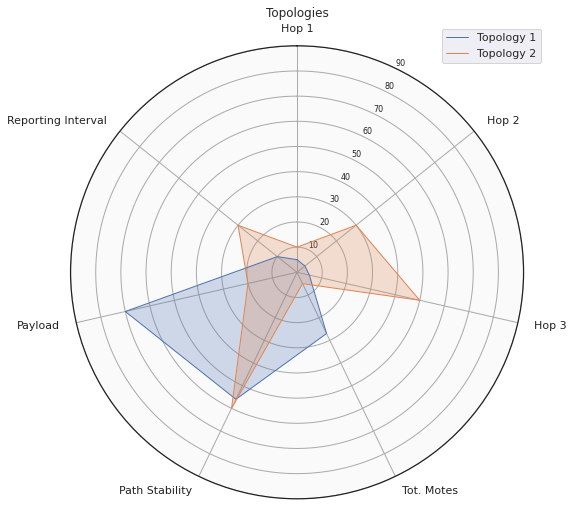

In [ ]:
labels = ['Hop 1', 'Hop 2', 'Hop 3', 'Tot. Motes', 'Path Stability', 'Payload', 'Reporting Interval']
legend = ['Topology 1', 'Topology 2']
matrix = [[10, 20, 30, 40, 50, 60, 70, 80, 90], 
          [5, 4, 5, 27, 56, 70, 10],
          [10, 30, 50, 5, 60, 20, 30]]
radar_chart(matrix, legend, labels, title='Topologies')

## Connectivity

From the original dataset only a subset is considered to create the described scenario. 

The 23 features kept are:  ['Time', 'Total Power', 'Dishwasher', 'Furnace 1', 'Furnace 2', 'Home Office', 'Fridge', 'Wine Cellar', 'Garage Door', 'Kitchen 1', 'Kitchen 2', 'Kitchen 3', 'Barn', 'Well', 'Microwave', 'Living Room', 'Temperature', 'Humidity',  'Pressure', 'Wind Speed', 'Wind Bearing', 'Precipitation', 'Dew Point']. 15 comes from power sensors, 7 from weather sensors such as temperature or pressure sensors. 

With regards to the number of motes or sensor nodes in the network it is possible to assume that it amounts to a total of 8-10 motes. The weather station consists in a sensor node located outside the house, namely in a garden or a terrace. The remaining nodes collect data about power consumption. Their number depends on the number and the position of the appliances observed by the sensors. The sensor node mock-up originated with Arduino can for instance support simultaneously up to 6 different sensors. Since the sensor are linked to both Arduino and the appliance through wires, it could be difficult to connect several appliances even if in the same room. 

In the scenario explored the motes can be distribuited as follows:
1. Weateher station: ['Temperature', 'Humidity',  'Pressure', 'Wind Speed', 'Wind Bearing', 'Precipitation', 'Dew Point']
2. Living Room: ['Living Room']
3. Kitchen 1: ['Dishwasher', 'Kitchen 1', 'Wine Cellar']
4. Kitchen 2: ['Fridge', 'Kitchen 2']
5. Kitchen 3: ['Kitchen 3', 'Microwave']
6. Office Room: ['Home Office']
7. Outside 1: ['Garage Door', 'Well']
8. Outside 2: ['Barn']
9. Furnace 1: ['Furnace 1']
10. Furnace 2: ['Furnace 2']

In general, a house is based on an area of about 80-90 m^2. This means that usually the distance that must be covered from the sensor nodes to the gateway is equalt to 30-40 m. However, it could be worth to evaluate the case in which the gateway and the nodes are further apart. 

The first arguments concern the topology and the structure of the network. Which topology is better: star or mesh? How many hops to consider? How to choose the reporting interval and the paylod size? What about the path stability?

**Star vs. Mesh**
---

10 motes. All the parameters are fixed except for the number of motes in the different hops. [Requested_service=60, reporting_interval=60, payload_size=90, stability=99, hardware=5800, supply=3.6, temperature=25]. In the star topology there is 1 gateway and 10 motes at the first hop. In the mesh for instance there are 5,3,2 sensor nodes at the 1°, 2°, 3° layer respectively. It is likely indeed that the near the gateway there are more motes rather than the opposite. As the ditance increases less motes are encountered.

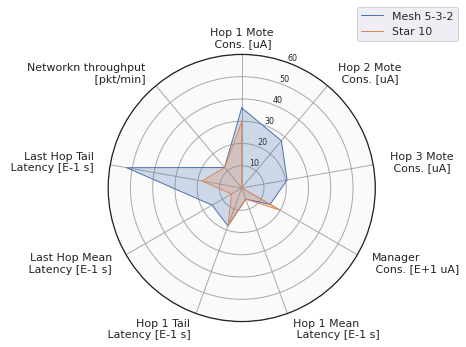

In [ ]:
labels = ['Hop 1 Mote\n Cons. [uA]', 'Hop 2 Mote\n Cons. [uA]', 'Hop 3 Mote\n Cons. [uA]', 'Manager\n Cons. [E+1 uA]', 
          'Hop 1 Mean\n Latency [E-1 s]', 'Hop 1 Tail\n Latency [E-1 s]', 'Last Hop Mean\n Latency [E-1 s]', 
          'Last Hop Tail\n Latency [E-1 s]', 'Networkn throughput\n [pkt/min]']
legend = ['Mesh 5-3-2', 'Star 10']
matrix = [[10, 20, 30, 40, 50, 60], 
          [36, 27.7, 20.7, 14.7, 5.3, 18.1, 15.4, 52.5, 12],
          [29.7, 0, 0, 20.0, 5.3, 18.1, 5.3, 18.1, 12]]
radar_chart(matrix, legend, labels, title=None, figsize=(6, 5), bbox_to_anchor=(1.33, 1.2))

**TRADE-OFF 1: Latency-Consumption "Motes far away consume less but at the price of higher latency".**

As we can see the latency increases with the distance and the number of hops the message pass through. In the mesh network the motes consume more since they work as both normal nodes and "routers". On the other hand, the gateway consumes more in the star network since it must manage alone the packages from all the nodes. Moreover, the star network cannot reach long distances when using most of the Low-Power connection technologies.

**Reporting Interval**
----
Fixed parameters for the chart below: [payload_size=90, stability=99, hardware=5800, supply=3.6, temperature=25] 

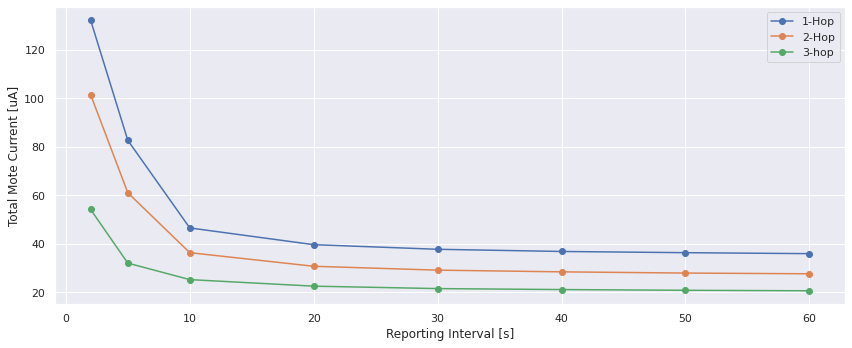

In [ ]:
matrix = [[2, 5, 10, 20, 30, 40, 50, 60], 
          [132.2, 82.7, 46.6, 39.7, 37.8, 36.9, 36.4, 36],
          [101.5, 61.1, 36.4, 30.8, 29.2, 28.5, 28, 27.7],
          [54.2, 32.1, 25.3, 22.6, 21.6, 21.2, 20.9, 20.7]]

lineplot(matrix, legend=['1-Hop', '2-Hop', '3-hop'],
         xlabel='Reporting Interval [s]', ylabel='Total Mote Current [uA]')

**TRADE-OFF 2: Data Rate-Consumption "Sending more frequent information increase the datarate but at a large energy consumption price."** 

The manager current and the latency change neither for the plot above nor for the plot below.

**Payload Size**
----

Fixed parameters: [reporting_interval=60, stability=99, hardware=5800, supply=3.6, temperature=25] 

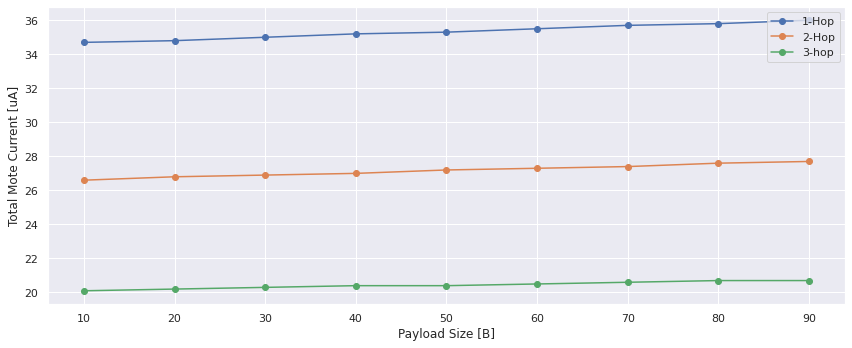

In [ ]:
matrix = [[10, 20, 30, 40, 50, 60, 70, 80, 90], 
          [34.7, 34.8, 35, 35.2, 35.3, 35.5, 35.7, 35.8, 36],
          [26.6, 26.8, 26.9, 27, 27.2, 27.3, 27.4, 27.6, 27.7],
          [20.1, 20.2, 20.3, 20.4, 20.4, 20.5, 20.6, 20.7, 20.7]]

lineplot(matrix, legend=['1-Hop', '2-Hop', '3-hop'],
         xlabel='Payload Size [B]', ylabel='Total Mote Current [uA]')

**TRADE-OFF 3: Payload-Consumption-Latency "Sending longer packets leads to a gain in terms of consumption but it might increase the delay (you need to wait to have 90bytes to send before sending the packet)"**


**Path Stability**
----

Fixed parameters: [reporting_interval=60, payload_size=90, hardware=5800, supply=3.6, temperature=25] 

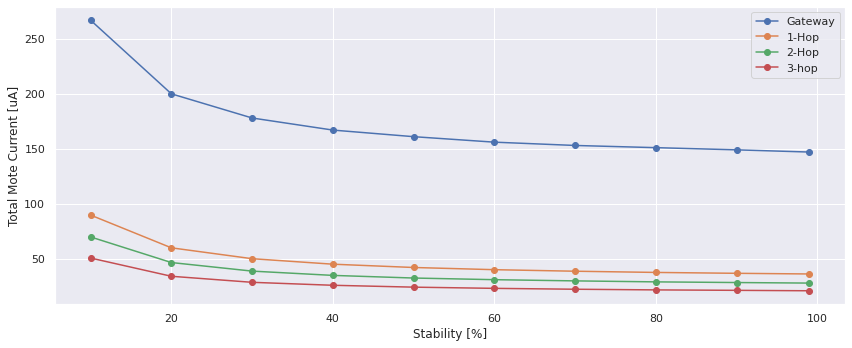

In [ ]:
matrix = [[10, 20, 30, 40, 50, 60, 70, 80, 90, 99], 
          [267, 200, 178, 167, 161, 156, 153, 151, 149, 147],
          [89.6, 59.8, 49.9, 44.9, 41.9, 39.9, 38.5, 37.4, 36.6, 36],
          [69.7, 46.4, 38.6, 34.7, 32.3, 30.8, 29.7, 28.8, 28.2, 27.7],
          [50.5, 33.9, 28.4, 25.7, 24.0, 22.9, 22.1, 21.5, 21.1, 20.7]]

lineplot(matrix, legend=['Gateway', '1-Hop', '2-Hop', '3-hop'],
         xlabel='Stability [%]', ylabel='Total Mote Current [uA]')

**Observation: reliability-consumption and latency "More reliable links lead to lower consumption and latency"**

**Total Network Consumption**
----

Parameters = [Requested_service=60, reporting_interval=60, payload_size=90, stability=99, hardware=5800, supply=3.6, temperature=25]

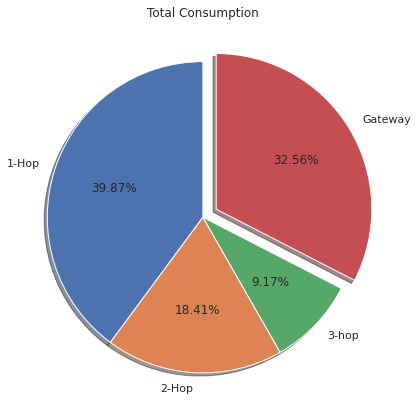

In [ ]:
motes_number = [5, 3, 2, 1] 
current_consumption = [36, 27.7, 20.7, 147]
labels = ['1-Hop', '2-Hop', '3-hop', 'Gateway']
pie_chart(motes_number, current_consumption, labels, 
          title='Total Consumption', detached_index=3)

**Network build time**
----

**TRADE-OFF 4: "With higher duty cycle the network synchronizes faster,
but at the price of higher consumption"**

Parameters = [Requested_service=60, reporting_interval=60, payload_size=90, stability=99, hardware=5800, supply=3.6, temperature=25, Mesh=5-3-2]

Change with path stability,  motes in the different layers and the temperature.

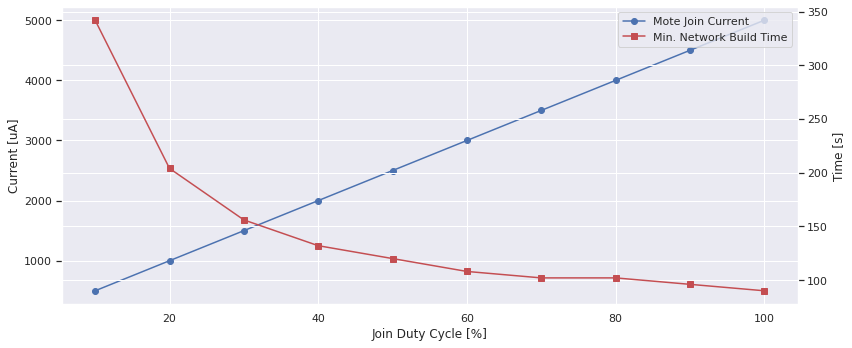

In [ ]:
matrix = [[10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
          [500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000],
          [342, 204, 156, 132, 120, 108, 102, 102, 96, 90]]

two_axis_lineplot(matrix, legend=['Mote Join Current', 'Min. Network Build Time'],
         xlabel='Join Duty Cycle [%]', ylabel1='Current [uA]', ylabel2='Time [s]', last=1)

**Battery life time**
----

**TRADE-OFF 5: Hogher current mean higher power consumption.**

[Requested_service=60, reporting_interval=60, payload_size=90, stability=99, hardware=5800, supply=3.6, temperature=25, Mesh=5-3-2]

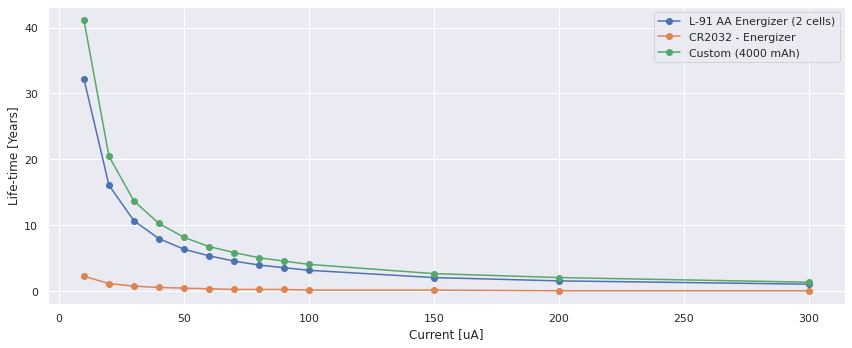

In [ ]:
matrix = [[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300], 
          [32.2, 16.1, 10.7, 8, 6.4, 5.4, 4.6, 4, 3.6, 3.2, 2.1, 1.6, 1.1],
          [2.3, 1.2, 0.8, 0.6, 0.5, 0.4, 0.3, 0.3, 0.3, 0.2, 0.2, 0.1, 0.1],
          [41.1, 20.5, 13.7, 10.3, 8.2, 6.8, 5.9, 5.1, 4.6, 4.1, 2.7, 2.1, 1.4]]

lineplot(matrix, legend=['L-91 AA Energizer (2 cells)', 'CR2032 - Energizer', 'Custom (4000 mAh)'],
         xlabel='Current [uA]', ylabel='Life-time [Years]')